# Unit 3 Assessment - Empirical Models

## Instructions

In this assessment, you are going to develop an emperical model by fitting a curve to data, and you will use your model to make predictions.

Scores are determined by:

- Successfully starting the C Level = 50 pts
- Perfectly completing the C Level = 75 pts
- Perfectly completing the B and C Levels = 85 pts
- Perfectly completing the A, B, and C Levels = 100 pts

You may use your Colab notebooks, our textbook, my notebook solutions, and any links to web sites I provide. (You may not use any other person or web site or book or resource, in general.) 

You may ask me for help **once**; however, you may ask for clarification as often as needed.

Add additional cells for both code and markdown as needed. Write answers to questions in narrative form in markdown. You may print values you need in your code, and then use these values in a written response.

All graphs should have correct titles and axis labels (with units).

## Grade

<font color="green"></font>

Level | Grade | Comment
--- | --- | ---
C (75 pts) | | 
B (10 pts) | | 
A (15 pts) | | 
Total | 


# Level C

## Exercise 0

1. Save a copy of this notebook to Google Drive. Have you already shared your Google Colabortory folder with "hpuphysics@gmail.com"? If not, then be sure to share your folder.

2. Add a text cell above and type your name as a level one heading in markdown. (A level one heading starts with # on its own line.)

3. Run the `import` statements below to add packages.

In [1]:
import numpy as np #used for arrays and numerical functions
import pandas as pd #used for reading a data file
import matplotlib.pyplot as plt #used for graphing
from io import StringIO #used to convert string to a dataframe
from scipy.optimize import curve_fit #used to find the fit parameters

## Exercise 1

Older people generally have high blood pressure compared to younger people. This [data set](https://raw.githubusercontent.com/atitus/math-modeling-2/main/unit-03/03-10-problem/blood-pressure-data.txt), shows the systolic blood pressure (in mm Hg) for people of various ages. Read the data and graph the systolic blood pressure as a function of age.

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/atitus/math-modeling-2/main/unit-03/03-10-problem/blood-pressure-data.txt", sep="\t")
df.head()

,Age (yrs),Systolic Blood Pressure (mm Hg)
0,39,144
1,45,138
2,47,145
3,65,162
4,46,142


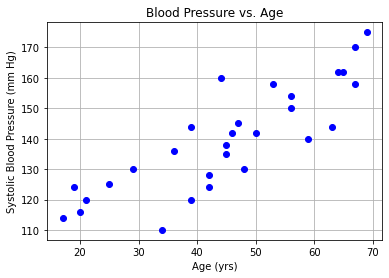

In [13]:
xdata = df['Age (yrs)']
ydata = df['Systolic Blood Pressure (mm Hg)']

plt.figure()
plt.title('Blood Pressure vs. Age')
plt.xlabel('Age (yrs)')
plt.ylabel('Systolic Blood Pressure (mm Hg)')
plt.plot(xdata, ydata, 'bo')
plt.grid()
plt.show()

## Exercise 2

For the data in Exercise 1, do a linear curve fit and print the best-fit parameters for blood pressure as a function of age. Plot the best-fit curve and the data on the same graph.

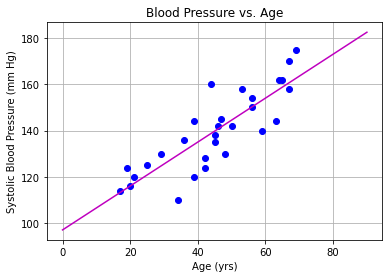

best-fit parameters =  [ 0.94932254 97.07708427]


In [17]:
model = lambda x, m, b: m*x+b

guess = [1,1]
params, stats = curve_fit(model, xdata, ydata, p0 = guess)

xmodel = np.linspace(0,90,100)
ymodel = model(xmodel, *params)

plt.figure()
plt.title('Blood Pressure vs. Age')
plt.xlabel('Age (yrs)')
plt.ylabel('Systolic Blood Pressure (mm Hg)')
plt.plot(xdata, ydata, 'bo')
plt.plot(xmodel, ymodel, 'm-')
plt.grid()
plt.show()

print("best-fit parameters = ", params)

## Exercise 3

Using your curve-fit, predict the blood pressure of a person at 90 years old, and predict the blood pressure of a newborn infant.

The following graph shows the model from age 0 through age 90. A 90 year-old is predicted to have a blood pressure of 180 mm Hg. An infant is predicted to have a blood pressure of 97 mm Hg, which is they y-intercept of the model.

The question can also be answered algebrically by printing `model(0,*params)` and `model(90,*params)`. This gives 97 mm Hg and 183 mm Hg, respectively.


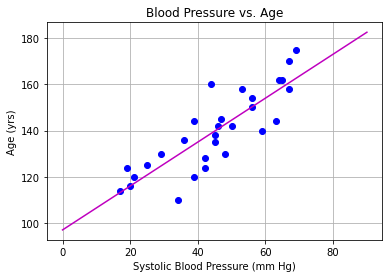

At age zero, the predicted blood pressure is  97.07708426598651 .
At age 90, the predicted blood pressure is  182.5161126258252 .


In [18]:
xmodel = np.linspace(0,90,100)
ymodel = model(xmodel, *params)

plt.figure()
plt.title('Blood Pressure vs. Age')
plt.xlabel('Systolic Blood Pressure (mm Hg)')
plt.ylabel('Age (yrs)')
plt.plot(xdata, ydata, 'bo')
plt.plot(xmodel, ymodel, 'm-')
plt.grid()
plt.show()


print("At age zero, the predicted blood pressure is ", model(0,*params), "mm Hg.")

print("At age 90, the predicted blood pressure is ", model(90,*params), "mm Hg.")

## Exercise 4

On average, by what percentage will a person's blood pressure increase between the age of 30 and the age of 50? You should use your model to answer the question, not individual data points.

Note: **percent increase** is the change in a quantity divided by the initial value of the quantity, expressed as a percentage.

Estimating from the graph gives an increase from approximately 125 mm Hg to 145 mm Hg, which is an increase of 20 mm Hg. If we calculate it algebraically, the increase is 19 mm Hg. The percentage increase is 15%.

In [19]:
print("At age 30, the predicted blood pressure is ", model(30,*params), "mm Hg.")

print("At age 50, the predicted blood pressure is ", model(50,*params), "mm Hg.")

dP = model(50,*params) - model(30,*params)

print("The increase in blood pressure is ", dP, "mm Hg.")

dPperc = dP/model(30,*params) * 100

print("The percentage increase in blood pressure is ", dPperc, "mm Hg.")

At age 30, the predicted blood pressure is  125.55676038593275 mm Hg.
At age 50, the predicted blood pressure is  144.54321113256356 mm Hg.
The increase in blood pressure is  18.98645074663081 mm Hg.
The percentage increase in blood pressure is  15.121806813325547 mm Hg.


## Exercise 5

What is a limitation of this data set and why should we not make any general conclusions (or general health recommendations or predictions) based on this data set? There are many limitations. For the sake of time, describe only one limitation.

This data shows a correlation, but probably not a causation, meaning that age does not cause higher blood pressure. Rather, high blood pressure is probably *caused* by other variables like poor nutrition, lack of exercise, etc. Therefore, adults should be advised about nutrition and exercise.

# Level B



## Exercise 1

Two HPU alumni, Chris Schorn and Shane Wiess, tested a t-shirt launcher designed and constructed by alumnus Noah Novembre. Chris and Shane measured the exit speed of a t-shirt as a function of the air pressure in the barrel. This [file](https://raw.githubusercontent.com/atitus/math-modeling-2/main/unit-03/03-10-problem/pressure-speed.txt) has their data.

Read the data and plot the exit speed of the t-shirt (when exiting the barrel) as a function of the air pressure in the barrel.

In [21]:
df = pd.read_csv("https://raw.githubusercontent.com/atitus/math-modeling-2/main/unit-03/03-10-problem/pressure-speed.txt", sep="\t")
df.head()

,P (psi),v (m/s)
0,20,1.36
1,25,2.24
2,30,3.52
3,35,4.33
4,40,5.22


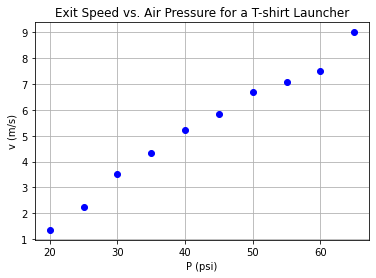

In [23]:
xdata = df['P (psi)']
ydata = df['v (m/s)']

plt.figure()
plt.title('Exit Speed vs. Air Pressure for a T-shirt Launcher')
plt.xlabel('P (psi)')
plt.ylabel('v (m/s)')
plt.plot(xdata, ydata, 'bo')
plt.grid()
plt.show()

## Exercise 2



Fit a curve to the exit speed as a function of air pressure using a power law plus a constant, of the form:

$$y = Ax^n + B$$

where $y$ is the air pressure and $x$ is the exit speed. Print the values of the best-fit parameters, A and B, and plot the best-fit curve on the same graph as the data.

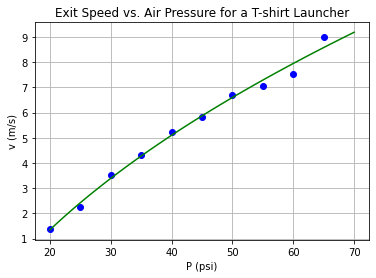

Fit parameters =  2.2440254769243393 -8.141095530564204 0.48108768832851745


In [26]:
model = lambda x, A, B, n: A*x**n + B

guess = [1,1,1]
params, stats = curve_fit(model, xdata, ydata, p0 = guess)

xmodel = np.linspace(20,70,100)
ymodel = model(xmodel, *params)

plt.figure()
plt.title('Exit Speed vs. Air Pressure for a T-shirt Launcher')
plt.xlabel('P (psi)')
plt.ylabel('v (m/s)')
plt.plot(xdata, ydata, 'bo')
plt.plot(xmodel, ymodel, 'g-')
plt.grid()
plt.show()

print("Fit parameters = ", *params)

## Exercise 3

Acccording to your model, what is the exit speed when the pressure is zero? 

The exit speed is approximately -8 m/s. Also, the parameter B gives you the speed at zero pressure, which is -8.14 m/s.

Is this physically possible?

No. Speed can never be negative. But if this represents "x-velocity" along the direction of the barrel, then a negative x-velocity would indicate the t-shirt is traveling backwards. This is impossible as well.

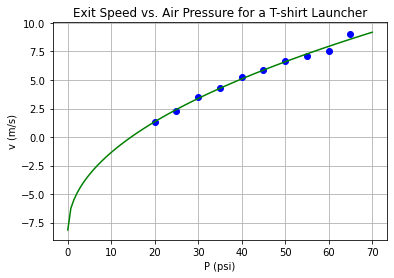

In [27]:
xmodel = np.linspace(0,70,100)
ymodel = model(xmodel, *params)

plt.figure()
plt.title('Exit Speed vs. Air Pressure for a T-shirt Launcher')
plt.xlabel('P (psi)')
plt.ylabel('v (m/s)')
plt.plot(xdata, ydata, 'bo')
plt.plot(xmodel, ymodel, 'g-')
plt.grid()
plt.show()

## Exercise 4

What is the minimum air pressure in the barrel in order for a t-shirt to exit the barrel (in other words, its exit speed is close to zero)?

Because the t-shirt is wedged into the barrel, it will not move until a minimum air pressure is reached. (There is significant friction on the t-shirt). This minimum air pressure is approximately 14 or 15 psi.

## Exercise 5

The barrel is composed of PVC that is rated for a maximum of 140 psi. At the maximum pressure for the barrel, what do you predict the exit speed of a t-shirt to be?

If we determine this with our model and best-fit parameters, it is 16 m/s.

In [29]:
v = model(140, *params)
print("v at P=140 is", v, "m/s.")

v at P=140 is 16.04153601083538 m/s.


# Level A

In Earth's atmosphere, a horizontal "slice" of air has to support the weight of the column of air above it. As a result, near Earth's surface the air pressure is greater than the air pressure at higher alitudes because near Earth, it has to support the weight of a much taller column. As a result, air pressure decreases with altitude.

But air is also compressible. Thus, near Earth, supporting a tall column of air causes the "slice" of air to compress and become more dense. At higher altitudes the air pressure is less so the air compresses less and is less dense. This variation in air density also contributes to a decreasing air pressure. 

As a result of each of the factors in the previous two paragraphs, the air pressure decreases non-linearly.

HPU alumnus Zach Hutchens (who is currently a PhD student in astrophysics at UNC) built a high-altitude balloon in which he counted muons in the Earth's atmosphere that result from cosmic rays interacting with the atmosphere. Along the way, he measured the air pressure as a function of the altitude of the balloon.

## Exercise 1

Zach's data for air pressure and altitude is in the file [air-pressure-data.txt](https://raw.githubusercontent.com/atitus/math-modeling-2/main/unit-03/03-10-problem/air-pressure-data.txt). Read the data and plot the air pressure as a function of altitude.

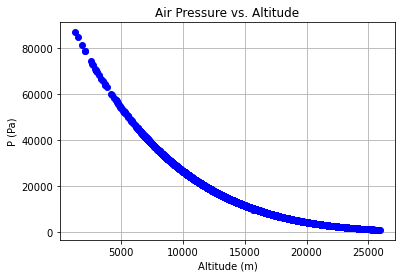

In [35]:
df = pd.read_csv("https://raw.githubusercontent.com/atitus/math-modeling-2/main/unit-03/03-10-problem/air-pressure-data.txt", sep="\t")
df.head()

xdata = df['Altitude (m)']
ydata = df['Pressure (Pa)']

plt.figure()
plt.title('Air Pressure vs. Altitude')
plt.xlabel('Altitude (m)')
plt.ylabel('P (Pa)')
plt.plot(xdata, ydata, 'bo')
plt.grid()
plt.show()

## Exercise 2

Fit the data for air pressure as a function of altitude with an exponential decay model:

$$y = Ae^{-rx}$$

where $A$ and $r$ are curve fit parameters. Plot the model and data on the same axes.

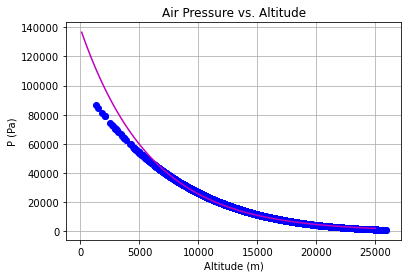

Fit parameters =  138947.97169325806 0.00016896471819214233


In [36]:
xdata = df['Altitude (m)']
ydata = df['Pressure (Pa)']

model = lambda x, A, r: A*np.exp(-r*x)

guess = [100000,1/2e4]
params, stats = curve_fit(model, xdata, ydata, p0 = guess)

xmodel = np.linspace(100,25000,100)
ymodel = model(xmodel, *params)

plt.figure()
plt.title('Air Pressure vs. Altitude')
plt.xlabel('Altitude (m)')
plt.ylabel('P (Pa)')
plt.plot(xdata, ydata, 'bo')
plt.plot(xmodel, ymodel, 'm-')
plt.grid()
plt.show()

print("Fit parameters = ", *params)

## Exercise 3

How high did Zach's balloon travel in feet? (There are 3.28 feet in one meter.)

The balloon travelled 85,000 ft. It was a bummer because we were hoping for 100,000 ft.

In [38]:
hmax = np.max(xdata)
print("Max altitude in m = ", hmax)

hmaxft = 3.28*hmax
print("Max altitude in ft = ", hmaxft)


Max altitude in m =  25914.43289
Max altitude in ft =  84999.3398792


## Exercise 4

If Zach's balloon had travelled to 50,000 m, what does your model predict for the air pressure? 

If you want to graph data within a certain range, you can use:

```
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
```

where `xmin`, `xmax`, `ymin`, and `ymax` are the minimum and maximum values on the x and y axes, respectively.

You can use your graph or you can calculate it with your model. The predicted pressure is 30 Pa.

In [41]:
P = model(5e4, *params)
print("At 50,000 m, the predicted P is ", P, "Pa.")

At 50,000 m, the predicted P is  29.77350571450857 Pa.


## Exercise 5

A theoretical calculation for the air pressure at an altitude of 50,000 m is approximately 67 Pa. Compare your model's prediction to this value. Does your model predict too large of a pressure at this altitude or too small?

Our model based on a curve fit to data predicted a smaller pressure than what is predicted by theory.